Importing the Libraries

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For Plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import yfinance as yf

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor


# For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

Data Ingestion

In [2]:
# Read data from Yahoo! Finance-AAPL
df = pd.read_csv('Yahoo! Finance- AAPL.csv')

Date Preparation

In [3]:
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561531,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846375,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081490,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257095,132079200
5,2020-01-09,76.809998,77.607498,76.550003,77.407501,75.834381,170108400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       731 non-null    object 
 1   Open       731 non-null    float64
 2   High       731 non-null    float64
 3   Low        731 non-null    float64
 4   Close      731 non-null    float64
 5   Adj Close  731 non-null    float64
 6   Volume     731 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.1+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,731.000000,731.000000,731.000000,731.000000,731.000000,7.310000e+02
mean,129.908071,131.570982,128.316973,130.012025,128.951549,1.132230e+08
std,31.038309,31.287961,30.732466,31.015317,31.258368,5.649382e+07
min,57.020000,57.125000,53.152500,56.092499,55.082977,4.100000e+07
25%,115.255001,116.600003,113.615002,115.125000,113.637451,7.681565e+07
50%,135.490005,136.960007,133.610001,134.990005,133.726639,9.641880e+07
75%,150.930001,152.595001,149.349999,151.035004,150.485366,1.305856e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,4.265100e+08


In [6]:
df.shape

(731, 7)

In [7]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df
  
# Drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561531,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846375,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081490,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257095,132079200
...,...,...,...,...,...,...
2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400
2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600
2022-11-21,150.160004,150.369995,147.720001,148.009995,148.009995,58724100


Exploratory Data Analysis

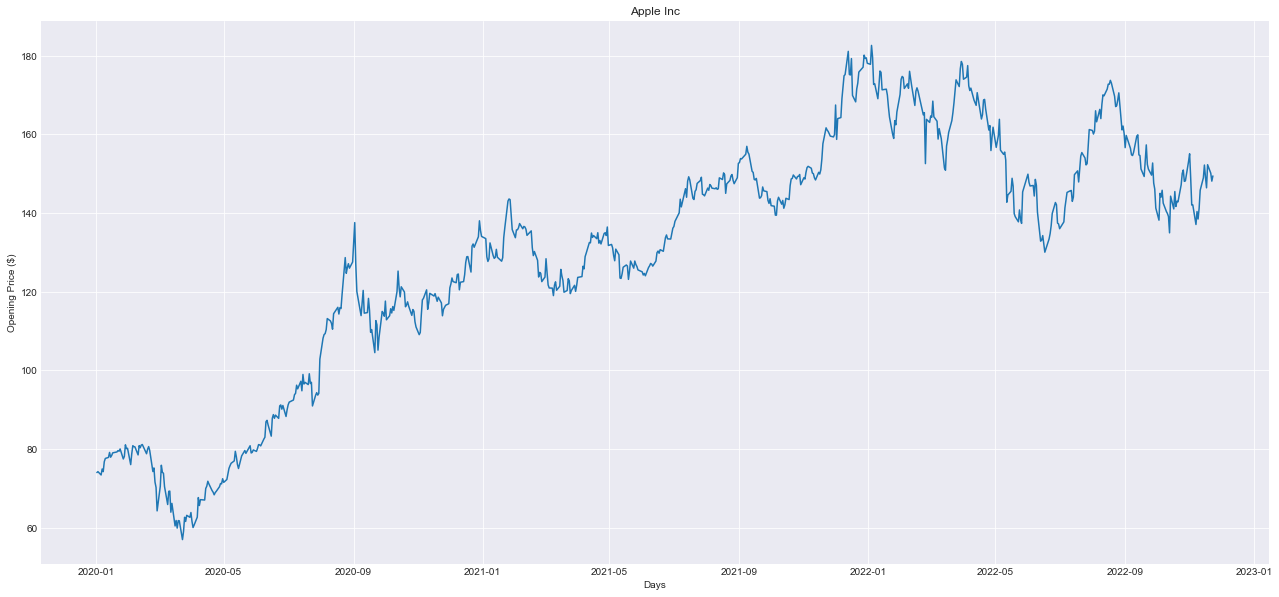

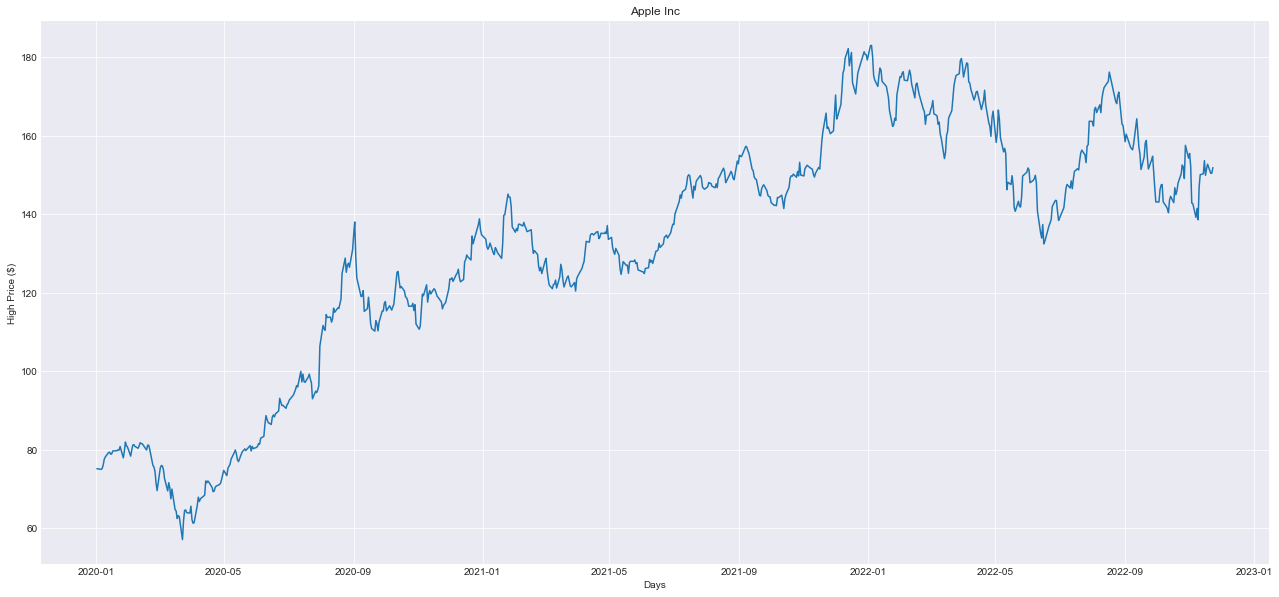

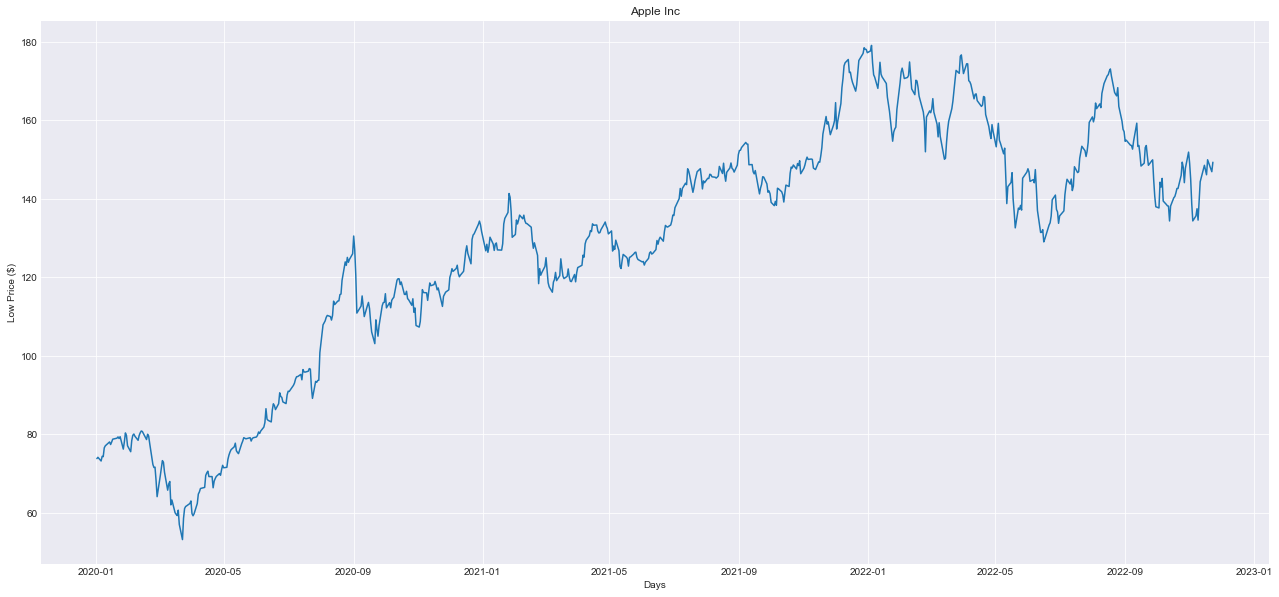

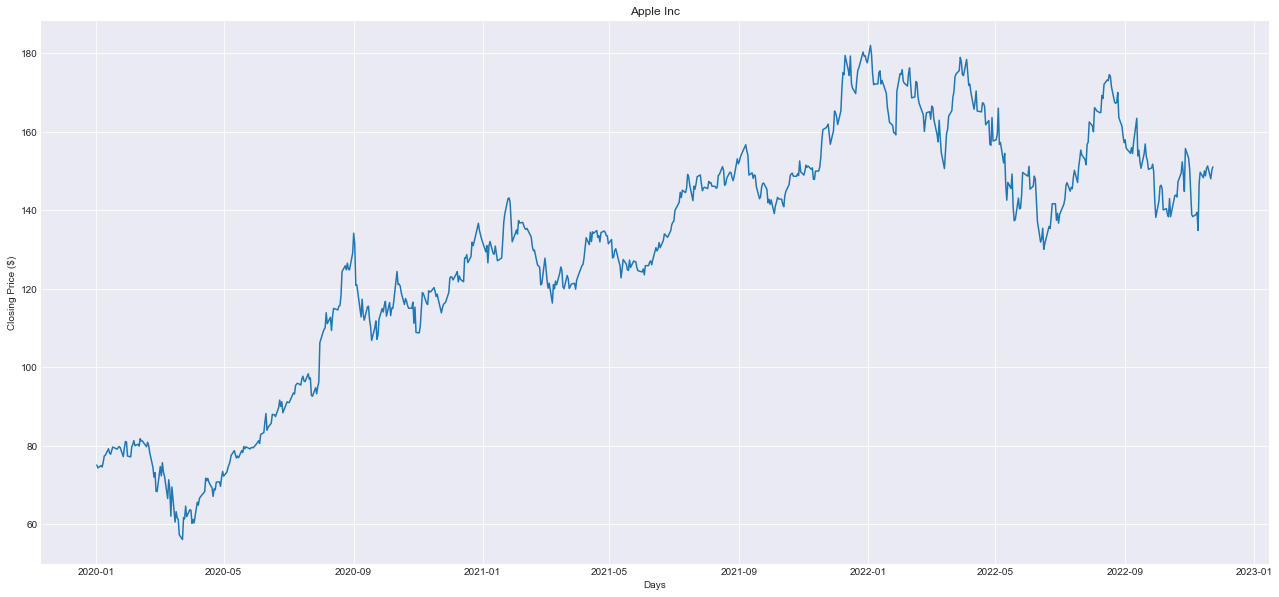

In [8]:
# Visualizing the 0pening Prices of the data.
plt.figure(figsize=(22,10))
plt.title('Apple Inc')
plt.xlabel('Days')
plt.ylabel('Opening Price ($)')
plt.plot(df['Open'])

# Visualizing the High Prices of the data.
plt.figure(figsize=(22,10))
plt.title('Apple Inc')
plt.xlabel('Days')
plt.ylabel('High Price ($)')
plt.plot(df['High'])

# Visualizing the Low Prices of the data.
plt.figure(figsize=(22,10))
plt.title('Apple Inc')
plt.xlabel('Days')
plt.ylabel('Low Price ($)')
plt.plot(df['Low'])

# Visualizing the Closing Prices of the data.
plt.figure(figsize=(22,10))
plt.title('Apple Inc')
plt.xlabel('Days')
plt.ylabel('Closing Price ($)')
plt.plot(df['Close'])

plt.show()

Data Segregation For Decision Tree Regression

In [9]:
df2 = df['Close']

In [10]:
df2.tail()

Date
2022-11-17    150.720001
2022-11-18    151.289993
2022-11-21    148.009995
2022-11-22    150.179993
2022-11-23    151.070007
Name: Close, dtype: float64

In [11]:
df2 = pd.DataFrame(df2)

In [12]:
df2.tail()

,Close
Date,
2022-11-17,150.720001
2022-11-18,151.289993
2022-11-21,148.009995
2022-11-22,150.179993
2022-11-23,151.070007


In [13]:
# Prediction 60 days into the future.
future_days = 60
df2['Prediction'] = df2['Close'].shift(-future_days)

In [14]:
df2.tail()

,Close,Prediction
Date,,
2022-11-17,150.720001,NaN
2022-11-18,151.289993,NaN
2022-11-21,148.009995,NaN
2022-11-22,150.179993,NaN
2022-11-23,151.070007,NaN


In [16]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 75.087502]
 [ 74.357498]
 [ 74.949997]
 [ 74.597504]
 [ 75.797501]
 [ 77.407501]
 [ 77.582497]
 [ 79.239998]
 [ 78.169998]
 [ 77.834999]
 [ 78.809998]
 [ 79.682503]
 [ 79.142502]
 [ 79.425003]
 [ 79.807503]
 [ 79.577499]
 [ 77.237503]
 [ 79.422501]
 [ 81.084999]
 [ 80.967499]
 [ 77.377502]
 [ 77.165001]
 [ 79.712502]
 [ 80.362503]
 [ 81.302498]
 [ 80.0075  ]
 [ 80.387497]
 [ 79.902496]
 [ 81.800003]
 [ 81.217499]
 [ 81.237503]
 [ 79.75    ]
 [ 80.904999]
 [ 80.074997]
 [ 78.262497]
 [ 74.544998]
 [ 72.019997]
 [ 73.162498]
 [ 68.379997]
 [ 68.339996]
 [ 74.702499]
 [ 72.330002]
 [ 75.684998]
 [ 73.230003]
 [ 72.2575  ]
 [ 66.542503]
 [ 71.334999]
 [ 68.857498]
 [ 62.057499]
 [ 69.4925  ]
 [ 60.552502]
 [ 63.215   ]
 [ 61.6675  ]
 [ 61.195   ]
 [ 57.310001]
 [ 56.092499]
 [ 61.720001]
 [ 61.380001]
 [ 64.610001]
 [ 61.935001]
 [ 63.702499]
 [ 63.572498]
 [ 60.227501]
 [ 61.232498]
 [ 60.352501]
 [ 65.6175  ]
 [ 64.857498]
 [ 66.517502]
 [ 66.997498]
 [ 68.3125  ]
 [ 71.762497]
 [ 71.

In [18]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 63.702499  63.572498  60.227501  61.232498  60.352501  65.6175
  64.857498  66.517502  66.997498  68.3125    71.762497  71.107498
  71.672501  70.699997  69.232498  67.092499  69.025002  68.7575
  70.7425    70.792503  69.644997  71.932503  73.449997  72.267502
  73.290001  74.389999  75.157501  75.934998  77.532501  78.752502
  77.852501  76.912498  77.385002  76.927498  78.739998  78.285004
  79.807503  79.212502  79.722504  79.182503  79.527496  79.5625
  79.485001  80.462502  80.834999  81.279999  80.580002  82.875
  83.364998  85.997498  88.209999  83.974998  84.699997  85.747498
  88.019997  87.897499  87.932503  87.43      89.717499  91.6325
  90.014999  91.209999  88.407501  90.445     91.199997  91.027496
  91.027496  93.462502  93.172501  95.342499  95.752502  95.919998
  95.477501  97.057503  97.724998  96.522499  96.327499  98.357498
  97.        97.272499  92.845001  92.614998  94.809998  93.252502
  95.040001  96.190002 106.260002 108.9375   109.665001 110.0625
 113.902

Model Training for Decision Tree Regression

In [19]:
# Splitting of data into Training and Testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
# Implementing Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [21]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[146.139999],
       [148.710007],
       [147.960007],
       [142.639999],
       [137.130005],
       [131.880005],
       [132.759995],
       [135.429993],
       [130.059998],
       [131.559998],
       [135.869995],
       [135.350006],
       [138.270004],
       [141.660004],
       [141.660004],
       [137.440002],
       [139.229996],
       [136.720001],
       [138.929993],
       [141.559998],
       [142.919998],
       [146.350006],
       [147.039993],
       [144.869995],
       [145.860001],
       [145.490005],
       [148.470001],
       [150.169998],
       [147.070007],
       [151.      ],
       [153.039993],
       [155.350006],
       [154.089996],
       [152.949997],
       [151.600006],
       [156.789993],
       [157.350006],
       [162.509995],
       [161.509995],
       [160.009995],
       [166.130005],
       [165.809998],
       [165.350006],
       [164.869995],
       [164.919998],
       [169.240005],
       [168.490005],
       [172.1

In [22]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[153.090004   160.790001   155.809998   154.529999   155.960007
 138.925003   157.369995   163.429993   153.839996   155.309998
 152.369995   150.699997   154.479996   155.3099975  155.3099975
 152.740005   150.429993   150.770004   133.110001   180.330002
 137.989998   138.199997   142.449997   146.100006   148.66666667
 145.429993   142.899994   140.419998   138.979996   168.639999
 161.410004   138.380005   142.410004   143.75       143.860001
 143.389999   147.270004   149.449997   167.300003   149.350006
 144.800003   155.740005   153.339996   150.649994   145.029999
 138.880005   130.059998   152.059998   139.5        163.979996
 146.869995   149.699997   148.279999   150.039993   147.93
 150.720001   151.289993   148.009995   150.179993   151.070007  ]


In [23]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

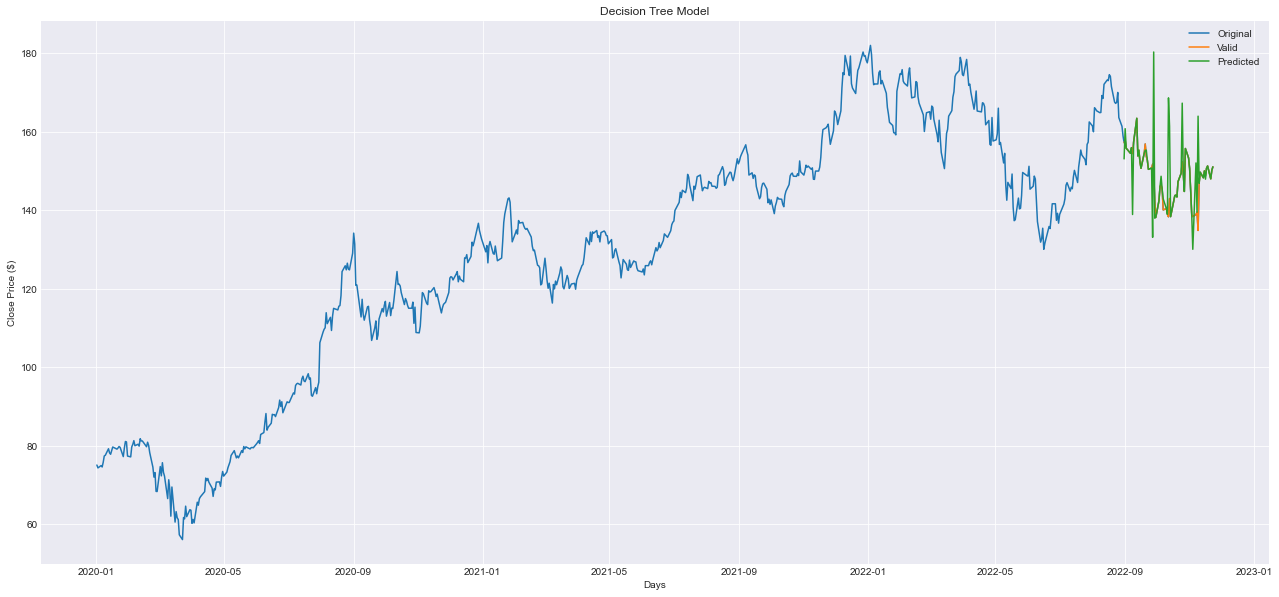

In [24]:
plt.figure(figsize=(22,10))
plt.title("Decision Tree Model")
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

Data Segregation For Support Vector Machine

In [25]:
# Define the explanatory variables
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2020-01-02,-1.027504,1.352501
2020-01-03,-0.070000,1.019997
2020-01-06,-1.502495,1.802498
2020-01-07,0.362495,0.854995
2020-01-08,-1.507500,1.820000


In [26]:
# Define the target variable
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,

Data Modelling For Support Vector Machine

In [27]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
y, test_size=0.20, random_state=1, stratify=y)

In [28]:
# SVM
# Support vector classifier
cls = SVC().fit(X_train, y_train)

# Fit the SVC model
svc = SVC(kernel='linear', C=20.0, random_state=1)
svc.fit(X_train, y_train)

SVC(C=20.0, kernel='linear', random_state=1)

In [29]:
# Strategy Implementation
# Prediction of Sell or Buy
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561531,135480400,-1.027504,1.352501,1,NaN,NaN,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846375,146322800,-0.070000,1.019997,1,-0.009722,-0.009722,-0.009722,-0.009722
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200,-1.502495,1.802498,1,0.007968,0.007968,-0.001754,-0.001754
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081490,108872000,0.362495,0.854995,1,-0.004703,-0.004703,-0.006457,-0.006457
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257095,132079200,-1.507500,1.820000,1,0.016086,0.016086,0.009629,0.009629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400,-4.290008,5.330002,1,0.012971,0.012971,0.894913,0.852736
2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600,1.020005,2.729996,1,0.003782,0.003782,0.898695,0.856518
2022-11-21,150.160004,150.369995,147.720001,148.009995,148.009995,58724100,2.150009,2.649994,1,-0.021680,-0.021680,0.877014,0.834837


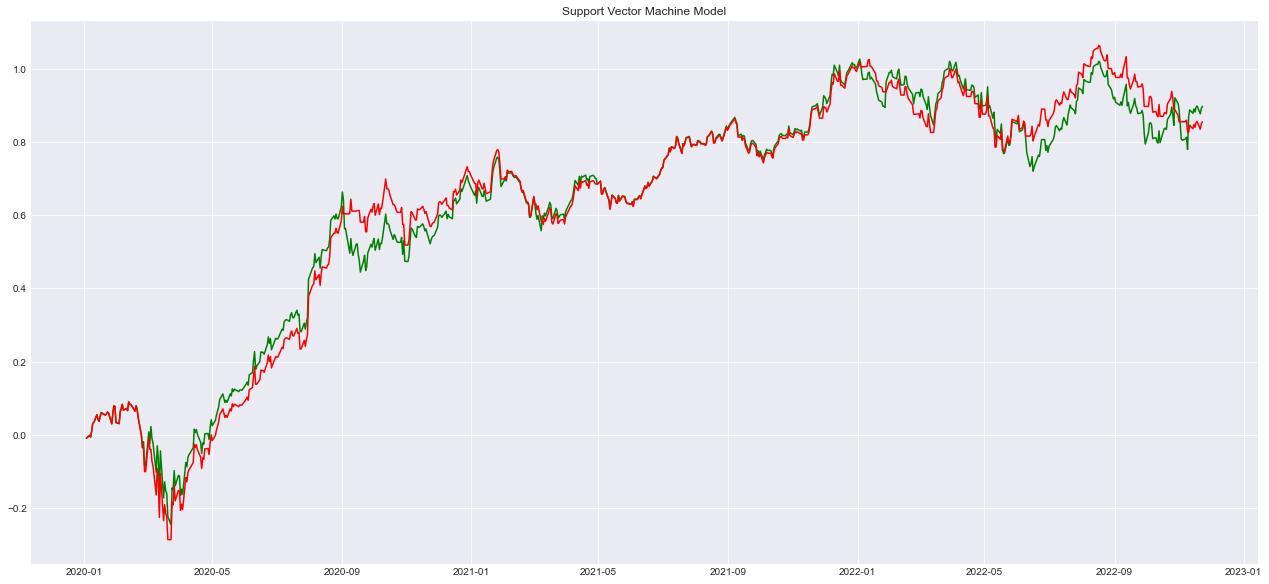

In [30]:
# Plot Strategy Returns vs Original Returns
plt.figure(figsize=(22,10))
plt.title('Support Vector Machine Model')
plt.plot(df['Cum_Ret'],color='green')
plt.plot(df['Cum_Strategy'],color='red')

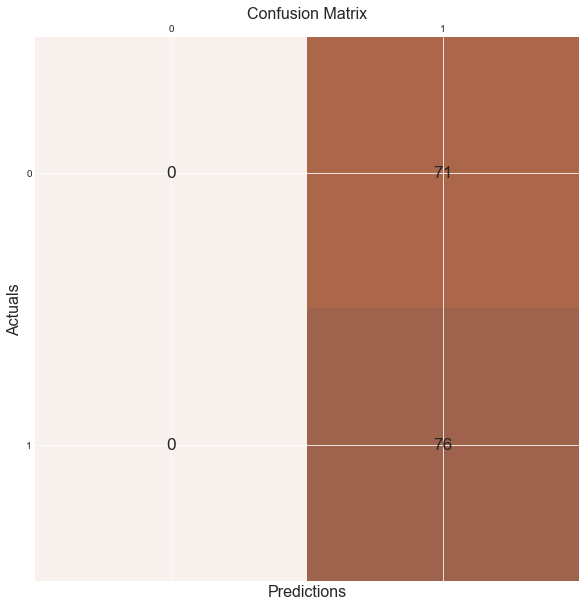

In [31]:
# Get the predictions
y_pred = svc.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.7)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [32]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

print('Recall: %.3f' % recall_score(y_test, y_pred))

print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.517
Recall: 1.000
F1 Score: 0.682


In [ ]:
Finished running the coode! Thank you!